<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Multiple_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression

In [43]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
california=fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [45]:
california.keys() #printing the california dictionary keys

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [46]:
print(california.DESCR) #printing the description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [47]:
california.target_names

['MedHouseVal']

In [48]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [49]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Creating the dataframe

In [50]:
df=pd.DataFrame(california.data,columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
df['Price']=california.target #adding the target column

In [52]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
df.isnull().sum() #checking for null values

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [56]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

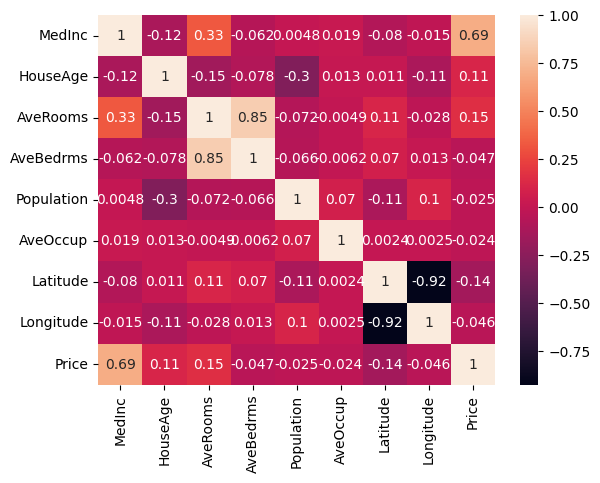

In [57]:
#checking correlation in diagram
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

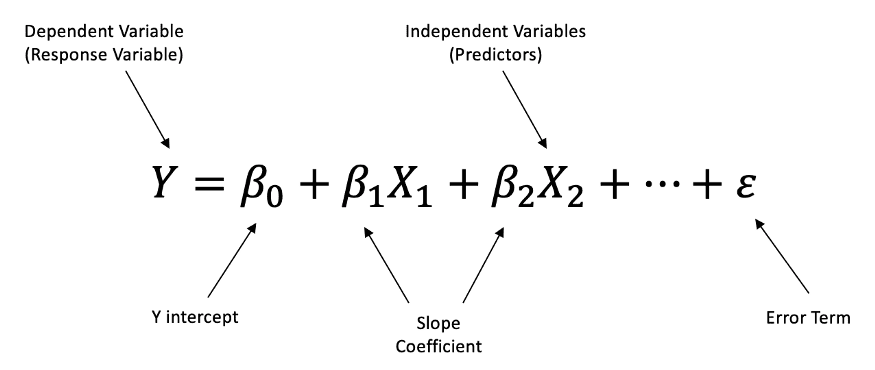

In [58]:
#independent and dependent features
X=df.iloc[:,:-1] #independent features (X1,X2...)
Y=df.iloc[:,-1] #dependent features (Y)

In [59]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Spliting the dataset

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

In [61]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [62]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
X_train,X_test

(array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
          0.96929441, -1.43979718],
        [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
         -0.75823526,  1.08204942],
        [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
          0.94594941, -1.2454256 ],
        ...,
        [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
          0.78720344, -1.10587678],
        [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
         -0.77224225,  0.66838683],
        [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
          0.77786545, -1.15073176]]),
 array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
         -0.68820027,  0.19491761],
        [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
          0.89459042, -1.36503888],
        [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
         -0.91698123,  0.89764561],
        ...,
        [ 0.36483158,  0.27015554,  0.04216837, ..., -

# Model Training

In [64]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor

LinearRegression()

In [65]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [66]:
print("the slope is : ",regressor.coef_) #[b_1,b_2,b_3...b_n]


the slope is :  [ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497]


In [67]:
print("the intercept(b_0) is : ",regressor.intercept_)

the intercept(b_0) is :  2.0634768086491184


In [68]:
Y_pred_test=regressor.predict(X_test)
Y_pred_test

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

## Perfomance Metrics



## MSE,MAE,RMSE

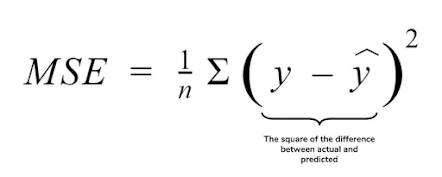


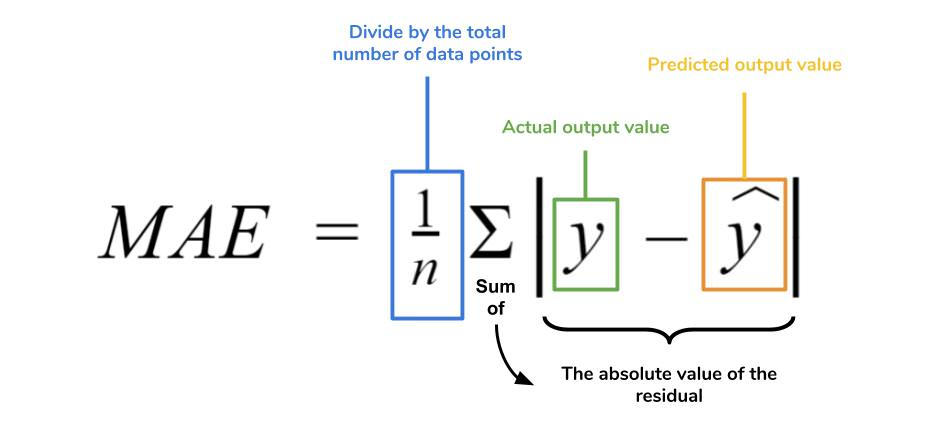

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print("mean squared error: ",mse)
print("mean absolute error: ",mae)
print("root mean squared error: ",mse)

mean squared error:  0.5522332399363619
mean absolute error:  0.5371056943007959
root mean squared error:  0.5522332399363619


## R square



Formula

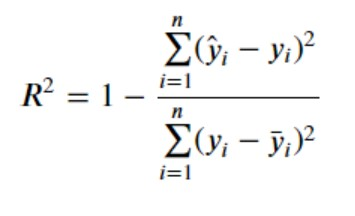


**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination

SSR	=	sum of squares of residuals

SST	=	total sum of squares

In [70]:
from sklearn.metrics import r2_score
r2_score= r2_score(Y_test,Y_pred_test)
print("R squared score: ",r2_score)

R squared score:  0.593595852643664


# Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]**

where:

R2: The R2 of the model

n: The number of observations

p: The number of predictor/independent variables

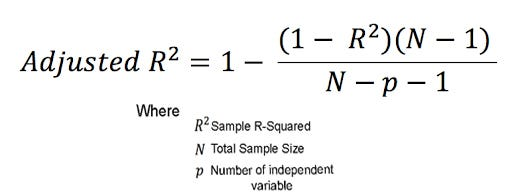

In [71]:
#calculation of adj r2
adj_r_squared=1-(1-r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
# X_test.shape will give [row,column] like (5,1) so we need to extract the column number

In [72]:
adj_r_squared

0.5931179409607519

## Assumptions

Text(0, 0.5, 'Test Predicted Data')

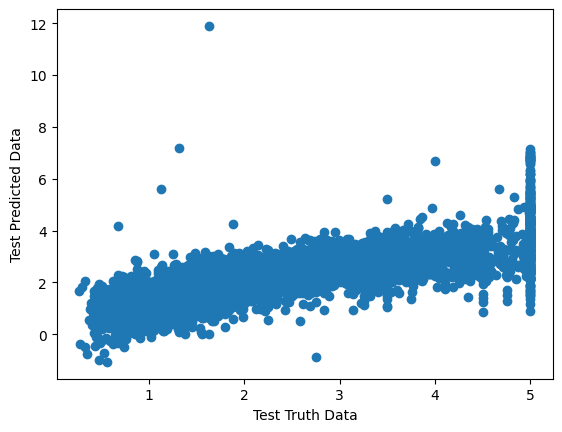

In [75]:
# the test data and predicted data will be in linear relationship
plt.scatter(Y_test,Y_pred_test)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

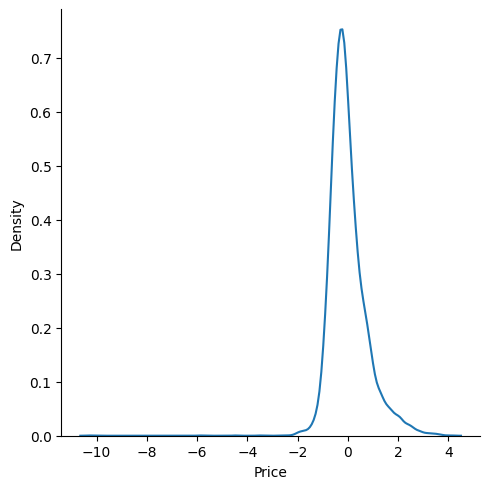

In [78]:
# residuals will be in normal distribution
residuals=Y_test-Y_pred_test
sns.displot(residuals,kind='kde')

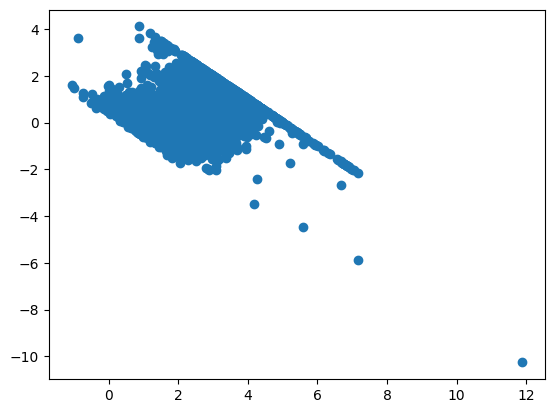

In [79]:
# Scatter plot with restpect to predictions and residuals will be in uniform distribution
plt.scatter(Y_pred_test,residuals)

## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [80]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))
model=pickle.load(open('regressor.pkl','rb'))


In [81]:
model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])